# Selecting Subsets of Data from DataFrames with just the brackets

## Selecting Subsets of Data

One of the most common tasks during a data analysis is to select a subset of the dataset. In pandas, this means selecting particular rows and/or columns from a DataFrame or selecting values from a Series. Although subset selection sounds like an easy task, and is an easy task for many other data manipulation tools, it's actually quite complex with pandas.

### Examples of Selections of Subsets of Data

The following images show different types of subset selection that are possible. We first highlight the values we want to select and then show the corresponding DataFrame after the completed selection.

### Selection of columns

The most common subset selection, involves selecting one or more of the columns of a DataFrame. In this example, we select the `color`, `age`, and `height` columns.

![][2]

The selection returns the following DataFrame:

![][3]

### Selection of rows

Subsets of rows are a less frequent selection. In this example, we select the rows labeled `Aaron` and `Dean`.

![][4]

The selection returns the following DataFrame:

![][5]

### Simultaneous selection of rows and columns

The last type of subset selection involves selecting rows and columns simultaneously. In this example, we select the `color`, `age`, and `height` columns along with the rows labeled `Aaron` and `Dean`.

![][6]

The selection returns the following DataFrame:

![][7]

[1]: images/sample_df.png
[2]: images/just_cols.png
[3]: images/just_cols2.png
[4]: images/just_rows.png
[5]: images/just_rows2.png
[6]: images/rows_cols.png
[7]: images/rows_cols2.png

## pandas dual references: by label and by integer location

As previously mentioned, the index of each DataFrame provides a label to reference each individual row. Similarly, the column names provide a label to reference each column. What hasn't been mentioned, is that each row and column may be referenced by an integer as well. I call this **integer location**. The integer location begins at 0 for the first row and continues sequentially one integer at a time until the last row. The last row will have integer location `n - 1`, where `n` is the total number of rows in the DataFrame. 

Take a look above at our DataFrame one more time. The rows with labels `Aaron` and `Dean` can also be referenced by their respective integer locations 2 and 4. Similarly, the columns `color`, `age`, and `height` can be referenced by their integer locations 1, 3, and 4.

The official pandas documentation refers to integer location as **position**. I don't particularly like this terminology as it's not as explicit as integer location. The key term here is **integers**.

### What's the difference between indexing and selecting subsets of data?

The documentation uses the term **indexing** frequently. This term is a shorter, more technical term that implies **subset selection**. I prefer the term subset selection as, again, it is more descriptive of what is actually happening. Indexing is also the term used in the official Python documentation (for selecting subsets of lists or strings for example).

## The three indexers `[ ]`, `loc`, `iloc`

pandas provides three **indexers** to select subsets of data. An indexer is a term for one of  `[ ]`, `loc`, or `iloc` and what makes the subset selection. All the details on how to make selections with each of these indexers will be covered. Each indexer has different rules for how they work. All of our selections will look similar to the following, except they will have something placed within the brackets.

```python
>>> df[]
>>> df.loc[]
>>> df.iloc[]
```

### Terminology

When the brackets are placed directly after the DataFrame variable name, the term **just the brackets** will be used to differentiate them from the brackets after `loc` and `iloc`.

### Square brackets instead of parentheses

One of the most common mistakes when using `loc` and `iloc` is to append parentheses to them, instead of square brackets. One of the main reasons this mistake is done is because `loc` and `iloc` appear to be methods and all methods are called with parentheses. Both `loc` and `iloc` are not methods, but are accessed in the same manner as methods through dot notation, which leads to the mistake.

Few objects accessed through dot notation use brackets instead of parentheses. In Python, the brackets are a universal operator for selecting subsets of data regardless of the type of object. The brackets select subsets of lists, strings, and select a single value in a dictionary. numpy arrays use the brackets operator for subset selection. If you are doing subset selection, it's likely that you need brackets and not parentheses.

## Begin with *just the brackets*

As we saw in a previous chapter, just the brackets are used to select a single column as a Series. We place the column name inside the brackets to return the Series. Let's read in a simple, small DataFrame and select a single column from it. We use the `index_col` parameter to set the index to the first column (integer location 0) on read.

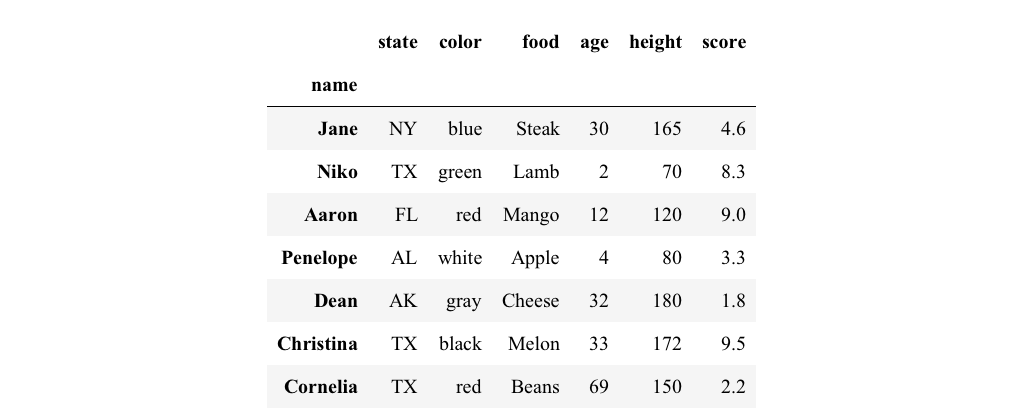

In [1]:
import pandas as pd
df = pd.read_csv('../data/sample_data.csv', index_col=0)
df

Append square brackets directly to the DataFrame variable name and then place the name of the column within those brackets. This selects a single column of data as a Series.

In [2]:
df['color']

name
Jane          blue
Niko         green
Aaron          red
Penelope     white
Dean          gray
Christina    black
Cornelia       red
Name: color, dtype: object

## Select multiple columns with a list

Select multiple columns by placing the column names in a list inside of just the brackets. Notice that a DataFrame and NOT a Series is returned.

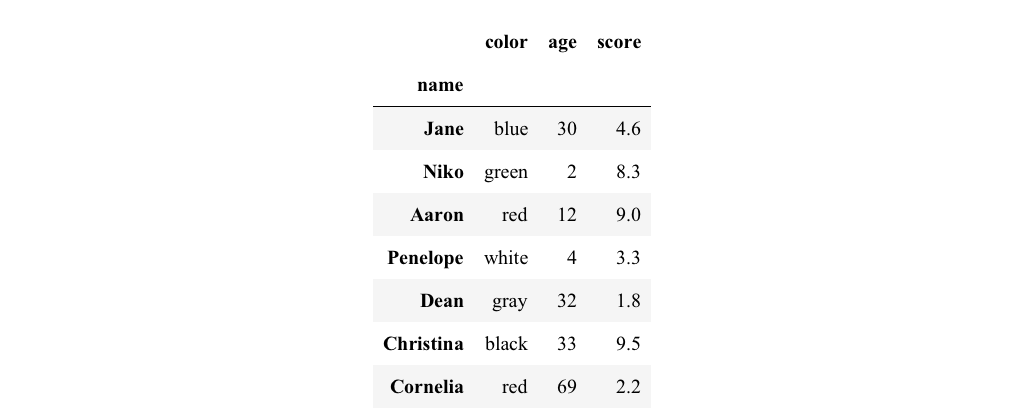

In [3]:
df[['color', 'age', 'score']]

### You must use an inner set of brackets

You might be tempted to do the following which will NOT work. When selecting multiple columns, you must use a **list** to contain the names. Remember that a list is defined by a set of square brackets, so the following raises an error.

In [ ]:
df['color', 'age', 'score']

### The inner square brackets define a list, the outer square brackets do subset selection

To help understand the double set of brackets, take a look at the following image. The inner set of brackets define a list of three items. The outer set of brackets mean something completely different. They inform the DataFrame to make a subset selection.

![][0]

This difference is confusing because the exact same syntax, the brackets, have a different meaning depending on where they are used. When the brackets are appended directly to the right of a variable name, they translate as subset selection. When the brackets appear apart from any variable, they translate to creating a list.

[0]: images/double_bracket_selection.png

### Use two lines of code to select multiple columns

To help clarify the process of making subset selection, I recommend using intermediate variables. In this instance, we assign the columns we would like to select to a list and then pass this list to the brackets.

In [ ]:
cols = ['color', 'age', 'score']
df[cols]

### Columns in any order

The order of the column names in the list is important. The new DataFrame will have the columns in the order given from the list.

In [ ]:
cols = ['height', 'age']
df[cols]

## Summary of *just the brackets*

The primary purpose of *just the brackets* is to select either one or more entire columns as either a Series or DataFrame. Providing it a single column returns a Series, while providing it a list of columns returns a DataFrame. In later chapters, we will see how to select rows using *just the brackets* by passing it a boolean Series.

## Exercises

Read in the movie dataset by executing the cell below and use it for the following exercises.

In [ ]:
pd.set_option('display.max_columns', 50)
movie = pd.read_csv('../data/movie.csv', index_col='title')
movie.head(3)

### Exercise 1
<span  style="color:green; font-size:16px">Select the column with the director's name as a Series</span>

### Exercise 2
<span  style="color:green; font-size:16px">Select the column with the director's name and number of Facebook likes.</span>

### Exercise 3
<span  style="color:green; font-size:16px">Select a single column as a DataFrame and not a Series</span>

### Exercise 4
<span  style="color:green; font-size:16px">Look in the data folder and read in another dataset. Select some columns from it.</span>